Class distribution after Random Under-Sampling:
Class
1    2
2    2
3    2
4    2
5    2
6    2
7    2
Name: count, dtype: int64
Class distribution after SMOTE:
Class
1    2
2    2
3    2
4    2
5    2
6    2
7    2
Name: count, dtype: int64
AUC Score for Class 1: 0.79
AUC Score for Class 2: 0.89
AUC Score for Class 3: 0.29
AUC Score for Class 4: 0.17
AUC Score for Class 5: 0.78
AUC Score for Class 6: 1.00
Average AUC Score: 0.65


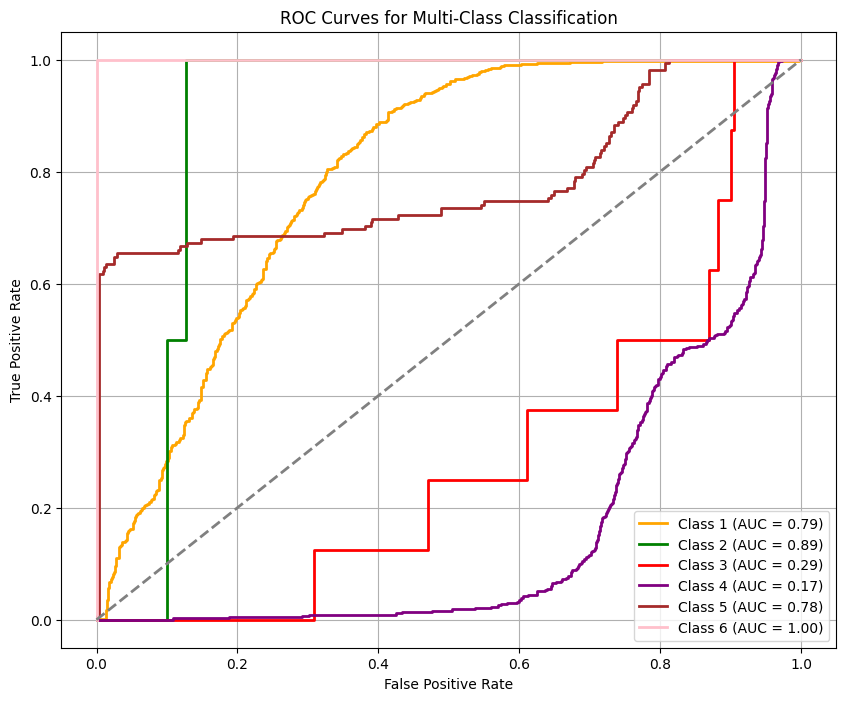

In [ ]:
# Step 1: Install Required Libraries (if not already installed)
# !pip install scikit-learn pandas imbalanced-learn matplotlib

# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import random

np.random.seed(4)
random.seed(4)

# Step 3: Load the Dataset
dataset_url = 'https://raw.githubusercontent.com/Fillipedem/UCI-Statlog-Shuttle/master/data/shuttle.tst'  # Shuttle dataset
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Class']  # Adjust column names
df = pd.read_csv(dataset_url, sep=' ', header=None, names=column_names)

# Step 4: Preprocess the Data
# Assume 'Class' is the target variable and the rest are features.
X = df.drop('Class', axis=1)
y = df['Class']

# Step 5: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Resample the Data using Random Under-Sampling first
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Check the distribution after undersampling
print("Class distribution after Random Under-Sampling:")
print(pd.Series(y_resampled).value_counts())

# Step 7: Resample the Data using SMOTE (Oversampling)
smote = SMOTE(random_state=42, k_neighbors=2)  # Set k_neighbors to 2
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled_smote).value_counts())

# Step 8: Train an SVM Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_resampled_smote, y_resampled_smote)

# Step 9: Make Predictions and Calculate AUC
y_pred_proba = svm.predict_proba(X_test)  # Get probabilities for all classes
auc_scores = {}

# Calculate AUC for each class
for i in np.unique(y_train):
    if i in y_test.values:
        auc_scores[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Print AUC for each class
for class_label, auc in auc_scores.items():
    print(f"AUC Score for Class {class_label}: {auc:.2f}")

# Optionally, calculate overall AUC by averaging class AUCs
average_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC Score: {average_auc:.2f}")

# Step 10: Plot the ROC Curves for each class
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Calculate and plot ROC curves for each class
for i in np.unique(y_train):
    if i in y_test.values:
        # Calculate the ROC curve for the current class
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {auc_scores[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

# Set plot attributes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Class distribution after Random Under-Sampling:
Sex
F    1046
I    1046
M    1046
Name: count, dtype: int64
Class distribution after SMOTE:
Sex
F    1046
I    1046
M    1046
Name: count, dtype: int64
AUC Score for Class F: 0.70
AUC Score for Class I: 0.86
AUC Score for Class M: 0.65
Average AUC Score: 0.74


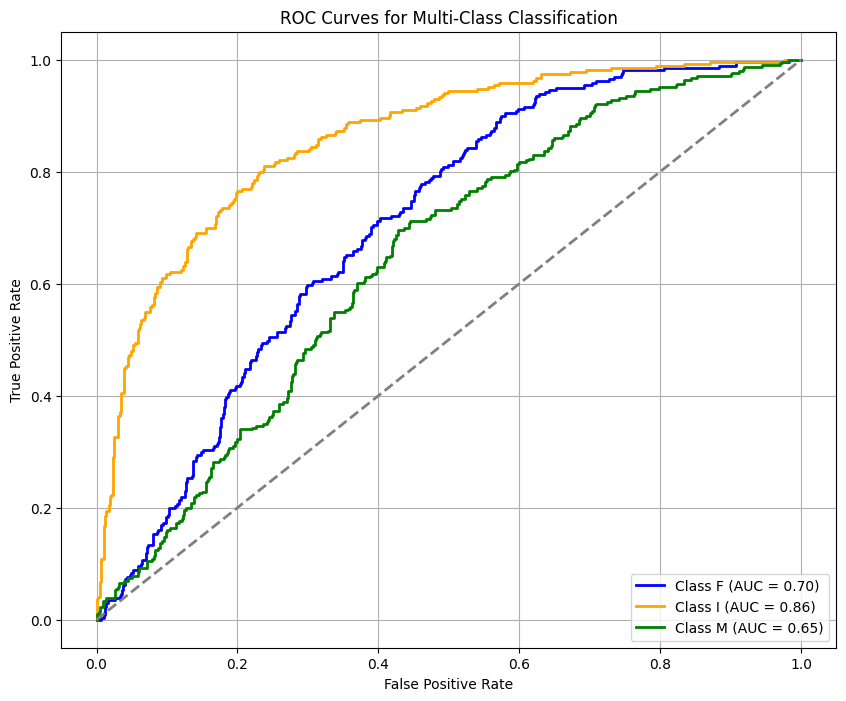

In [ ]:
# Abalone DataSet
# Step 1: Install Required Libraries (if not already installed)
# !pip install scikit-learn pandas imbalanced-learn matplotlib

# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import random

np.random.seed(4)
random.seed(4)

# Step 3: Load the Dataset
dataset_url2 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'  # Shuttle dataset
column_names2 = ['Sex',	'Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight'	,'Rings']  # Adjust column names
df = pd.read_csv(dataset_url2,header=None, names=column_names2 )

# Step 4: Preprocess the Data
# Assume 'Sex' is the target variable and the rest are features.
X = df.drop('Sex', axis=1)
y = df['Sex']

# Step 5: Split the Data into Training 80% and Test Sets20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Resample the Data using Random Under-Sampling first
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Check the distribution after undersampling
print("Class distribution after Random Under-Sampling:")
print(pd.Series(y_resampled).value_counts())

# Step 7: Resample the Data using SMOTE (Oversampling)
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled_smote).value_counts())

# Step 8: Train an SVM Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_resampled_smote, y_resampled_smote)

# Step 9: Make Predictions and Calculate AUC
y_pred_proba = svm.predict_proba(X_test)  # Get probabilities for all classes
auc_scores = {}

# Calculate AUC for each class
for class_label in np.unique(y_train):
    if class_label in y_test.values:
        auc_scores[class_label] = roc_auc_score(y_test == class_label, y_pred_proba[:, list(np.unique(y_train)).index(class_label)])

# Print AUC for each class
for class_label, auc in auc_scores.items():
    print(f"AUC Score for Class {class_label}: {auc:.2f}")

# Calculate the overall AUC by averaging class AUCs
average_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC Score: {average_auc:.2f}")

# Step 10: Plot the ROC Curves for each class
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = ['blue', 'orange', 'green']

# Calculate ROC curves for each class
for idx, class_label in enumerate(np.unique(y_train)):
    if class_label in y_test.values:
        # Calculate the ROC curve for the current class
        fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, idx])
        plt.plot(fpr, tpr, color=colors[idx % len(colors)], lw=2, label=f'Class {class_label} (AUC = {auc_scores[class_label]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

# Set plot attributes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Class distribution after Random Under-Sampling:
class
CYT    4
ERL    4
EXC    4
ME1    4
ME2    4
ME3    4
MIT    4
NUC    4
POX    4
VAC    4
Name: count, dtype: int64
Class distribution after SMOTE:
class
CYT    4
ERL    4
EXC    4
ME1    4
ME2    4
ME3    4
MIT    4
NUC    4
POX    4
VAC    4
Name: count, dtype: int64
AUC Score for Class CYT: 0.57
AUC Score for Class ERL: 1.00
AUC Score for Class EXC: 0.86
AUC Score for Class ME1: 0.97
AUC Score for Class ME2: 0.76
AUC Score for Class ME3: 0.37
AUC Score for Class MIT: 0.78
AUC Score for Class NUC: 0.62
AUC Score for Class POX: 0.38
AUC Score for Class VAC: 0.33
Average AUC Score: 0.66


<ipython-input-41-2aa3c4ad661f>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(y_train)))


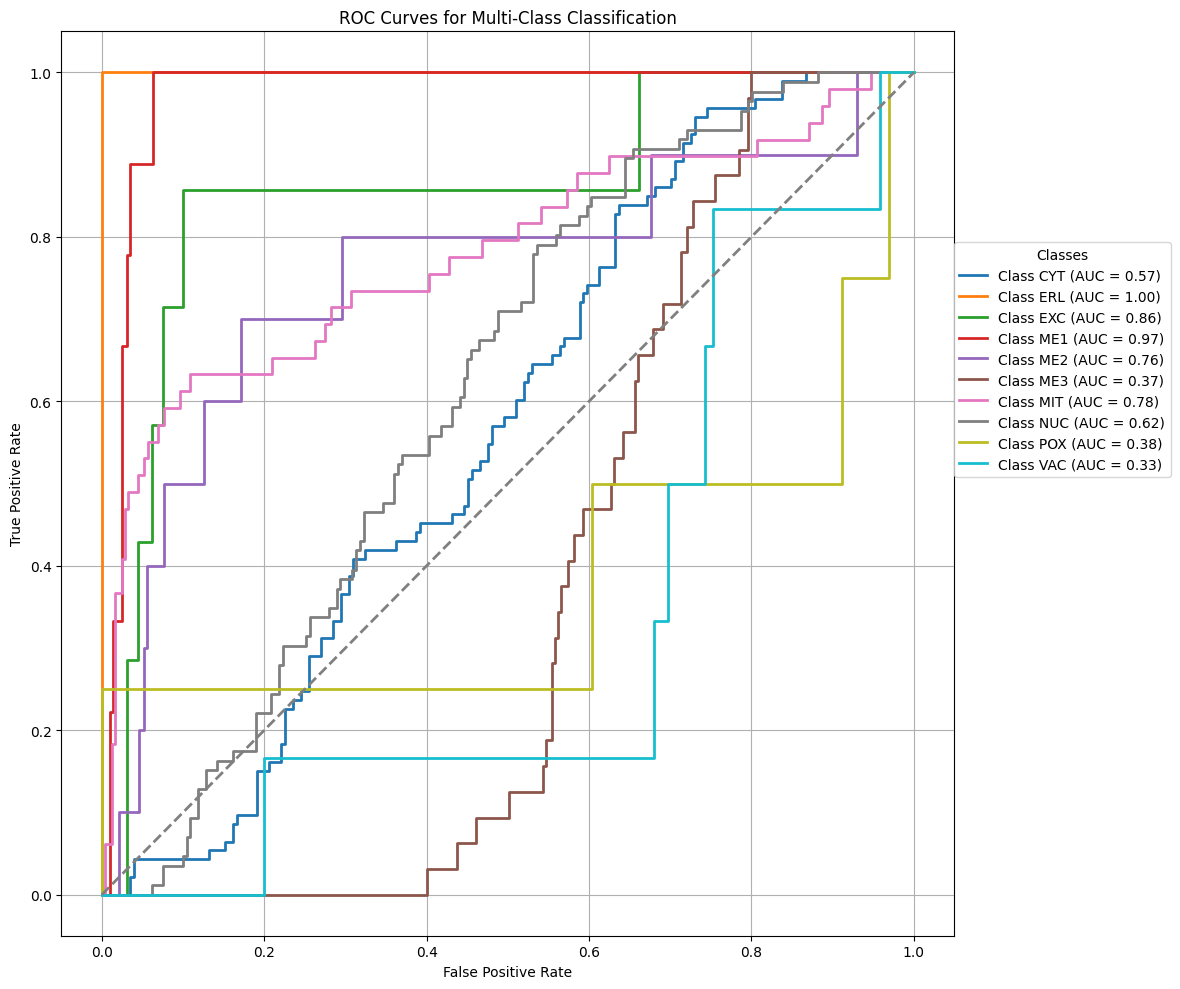

In [ ]:
# Step 1: Install Required Libraries (if not already installed)
# !pip install scikit-learn pandas imbalanced-learn matplotlib

# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

np.random.seed(4)
random.seed(4)

# Step 3: Load the Dataset
# Use the raw link from the dataset page on GitHub
dataset_url3 = 'https://raw.githubusercontent.com/mikeizbicki/datasets/master/csv/uci/yeast.data'
column_names3 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'class']  # Adjust column names

# Load the dataset
df = pd.read_csv(dataset_url3, sep='\s+', header=None, names=column_names3)

# Step 4: Preprocess the Data
# Assume 'class' is the target variable and the rest are features.
X = df.drop('class', axis=1)
y = df['class']

# Step 5: Split the Data into Training 80% and Test Sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Resample the Data using Random Under-Sampling first
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Check the distribution after undersampling
print("Class distribution after Random Under-Sampling:")
print(pd.Series(y_resampled).value_counts())

# Step 7: Resample the Data using SMOTE (Oversampling)
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled_smote).value_counts())

# Step 8: Train an SVM Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_resampled_smote, y_resampled_smote)

# Step 9: Make Predictions and Calculate AUC
y_pred_proba = svm.predict_proba(X_test)  # Get probabilities for all classes
auc_scores = {}

# Calculate AUC for each class
for class_label in np.unique(y_train):
    if class_label in y_test.values:
        auc_scores[class_label] = roc_auc_score(y_test == class_label, y_pred_proba[:, list(np.unique(y_train)).index(class_label)])

# Print AUC for each class
for class_label, auc in auc_scores.items():
    print(f"AUC Score for Class {class_label}: {auc:.2f}")

# Calculate the overall AUC by averaging class AUCs
average_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC Score: {average_auc:.2f}")

# Step 10: Plot the ROC Curves for each class
plt.figure(figsize=(12, 10))

# Generate more colors for the ROC plot since there are 10 classes
colors = plt.cm.get_cmap('tab10', len(np.unique(y_train)))

# Calculate ROC curves for each class
for idx, class_label in enumerate(np.unique(y_train)):
    if class_label in y_test.values:
        # Calculate the ROC curve for the current class
        fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, idx])
        plt.plot(fpr, tpr, color=colors(idx), lw=2, label=f'Class {class_label} (AUC = {auc_scores[class_label]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

# Set plot attributes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.5), title='Classes')
plt.grid()
plt.tight_layout()
plt.show()


Class distribution after Random Under-Sampling:
Churn
0    396
1    396
Name: count, dtype: int64
Class distribution after SMOTE:
Churn
0    396
1    396
Name: count, dtype: int64
AUC Score for Class 0: 0.77
AUC Score for Class 1: 0.77
Average AUC Score: 0.77


<ipython-input-9-b36c7563d2f3>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(y_train)))


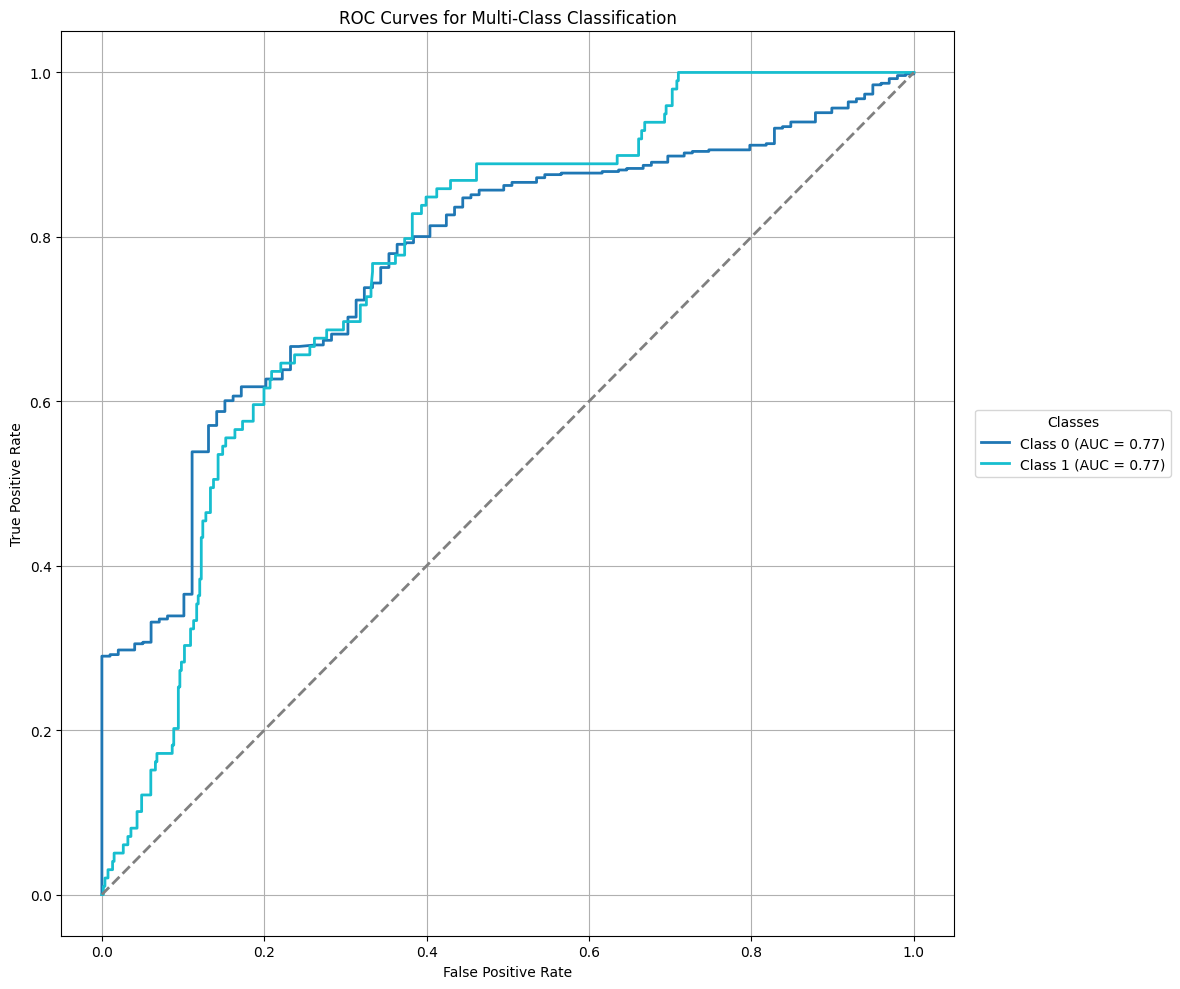

In [9]:
# Step 1: Install Required Libraries (if not already installed)
#!pip install scikit-learn pandas imbalanced-learn matplotlib

# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

np.random.seed(4)
random.seed(4)

# Step 3: Load the Dataset
# Use the raw link from the dataset page on GitHub
dataset_url3 = 'https://raw.githubusercontent.com/rohit-chandra/Customer_Churn_Analysis/refs/heads/main/data_preprocessing/churn_final.csv'
#column_names3 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'class']  # Adjust column names

# Load the dataset
df = pd.read_csv(dataset_url3, sep=',')

# Step 4: Preprocess the Data
# Assume 'class' is the target variable and the rest are features.
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 5: Split the Data into Training 80% and Test Sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Resample the Data using Random Under-Sampling first
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Check the distribution after undersampling
print("Class distribution after Random Under-Sampling:")
print(pd.Series(y_resampled).value_counts())

# Step 7: Resample the Data using SMOTE (Oversampling)
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled_smote).value_counts())

# Step 8: Train an SVM Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_resampled_smote, y_resampled_smote)

# Step 9: Make Predictions and Calculate AUC
y_pred_proba = svm.predict_proba(X_test)  # Get probabilities for all classes
auc_scores = {}

# Calculate AUC for each class
for class_label in np.unique(y_train):
    if class_label in y_test.values:
        auc_scores[class_label] = roc_auc_score(y_test == class_label, y_pred_proba[:, list(np.unique(y_train)).index(class_label)])

# Print AUC for each class
for class_label, auc in auc_scores.items():
    print(f"AUC Score for Class {class_label}: {auc:.2f}")

# Calculate the overall AUC by averaging class AUCs
average_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC Score: {average_auc:.2f}")

# Step 10: Plot the ROC Curves for each class
plt.figure(figsize=(12, 10))

# Generate more colors for the ROC plot since there are 10 classes
colors = plt.cm.get_cmap('tab10', len(np.unique(y_train)))

# Calculate ROC curves for each class
for idx, class_label in enumerate(np.unique(y_train)):
    if class_label in y_test.values:
        # Calculate the ROC curve for the current class
        fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, idx])
        plt.plot(fpr, tpr, color=colors(idx), lw=2, label=f'Class {class_label} (AUC = {auc_scores[class_label]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

# Set plot attributes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.5), title='Classes')
plt.grid()
plt.tight_layout()
plt.show()

